# Predicting Loan Repayment


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [1]:
# Import the following Libraries
# numpy
# pandas
# matplotlib plotting software
# seaborn 
# Make matplotlib available through all code boxes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# From Sklearn you'll have to look up from where here. 
# Label Encoder, train test split, logisitic regression, confusion_matrix, classification_report,accuracy_score
# DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,  SVC, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Plotly Express
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### **2- Getting Data**

In [2]:
# read the data from the csv into a dataframe
df=pd.read_csv('loandata.csv')

In [3]:
# show the top 4 lines of the dataframe
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [4]:
# show the shape of the dataframe
df.shape

(614, 13)

##### 2-1-Renaming columns

In [5]:
df.columns=df.columns.str.lower()

In [6]:
# rename all the columns as lowercase strings
df.columns = df.columns.str.lower()
df

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# rename all the columns so that they all have _ in between any column head with two or more words
rename_dict = {
    'applicantincome': 'applicant_income',
    'coapplicantincome': 'coapplicant_income',
    'loanamount': 'loan_amount',
    'loan_amount_term': 'loan_amount_term'  
}

df.rename(columns=rename_dict, inplace=True)

df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


##### 2-2-Checking null values

In [8]:
# Check all the columns to see if they have null values (NaN) and sum them
df.isnull().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [9]:
df['loan_amount']=df['loan_amount'].fillna(df['loan_amount'].mean())   

In [10]:
# fill the null values in the loan amount column with the mean of the loan amount  column

df['loan_amount_term']=df['loan_amount_term'].fillna(df['loan_amount_term'].mean())

In [11]:
# fill the null values in the  credit history column with the median of the credit history column

df['self_employed']=df['self_employed'].fillna(df['self_employed'].mode()[0])

In [12]:
df.dropna(axis=0, inplace=True)

# write down what this column does


Dropna removes missing values, axis=0 specifies that it should remove rows where NaN values exist, and inplace=True modifies DataFrame in place without creating a new DataFrame

In [13]:
# prove there are no more null values in the columns using the same command as above
df.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [14]:
# show the top 4 lines of the dataframe
df.head(4)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y


In [15]:
# show the new shape of the dataframe
df.shape

(537, 13)

In [16]:
# show the information/ statistics on this dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             537 non-null    object 
 1   gender              537 non-null    object 
 2   married             537 non-null    object 
 3   dependents          537 non-null    object 
 4   education           537 non-null    object 
 5   self_employed       537 non-null    object 
 6   applicant_income    537 non-null    int64  
 7   coapplicant_income  537 non-null    float64
 8   loan_amount         537 non-null    float64
 9   loan_amount_term    537 non-null    float64
 10  credit_history      537 non-null    float64
 11  property_area       537 non-null    object 
 12  loan_status         537 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 58.7+ KB


,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,537.000000,537.000000,537.000000,537.000000,537.000000
mean,5350.098696,1549.459814,144.031343,341.843575,0.849162
std,6003.553385,2510.368147,79.079983,63.787001,0.358225
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2882.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1126.000000,128.000000,360.000000,1.000000
75%,5800.000000,2254.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [17]:
# get statiscal information on the data frame like count/mean/standard deviation etc
df.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,537.000000,537.000000,537.000000,537.000000,537.000000
mean,5350.098696,1549.459814,144.031343,341.843575,0.849162
std,6003.553385,2510.368147,79.079983,63.787001,0.358225
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2882.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1126.000000,128.000000,360.000000,1.000000
75%,5800.000000,2254.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


##### 2-3-Label Encoder for Dependents

In [18]:
type(df['dependents'].iloc[0])

str

In [19]:
df['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [20]:
model6=LabelEncoder()

In [21]:
model6.fit(df['dependents'])

LabelEncoder()

In [22]:
df['dependents']= model6.transform(df['dependents'])

Explain what they are doing in this section:
They are using LabelEncoder from sklearn.preprocessing to convert categorical data in the dependents column into numerical labels

### 3-Exploratory Data Analysis

##### 3-1- Visualization

In [23]:
# get the counts of Loan statuses with "Y" in the column
status_counts = df['loan_status'].value_counts()
count_Y = status_counts['Y']
count_Y

369

In [24]:
# get the counts of Loan statuses with "N" in the column
status_counts = df['loan_status'].value_counts()
count_N = status_counts['N']
count_N

168

In [25]:
# make a pie plot that shows the distrubution of Yes loans and Y loans
# this plot should have a title, different colors, the percentages inside the sections 

fig = px.pie(df, names='loan_status', title='Loan Status Distribution', hole=0.5)
fig.show()

69% of applicants repay the loan and 39% do not repay the loan.

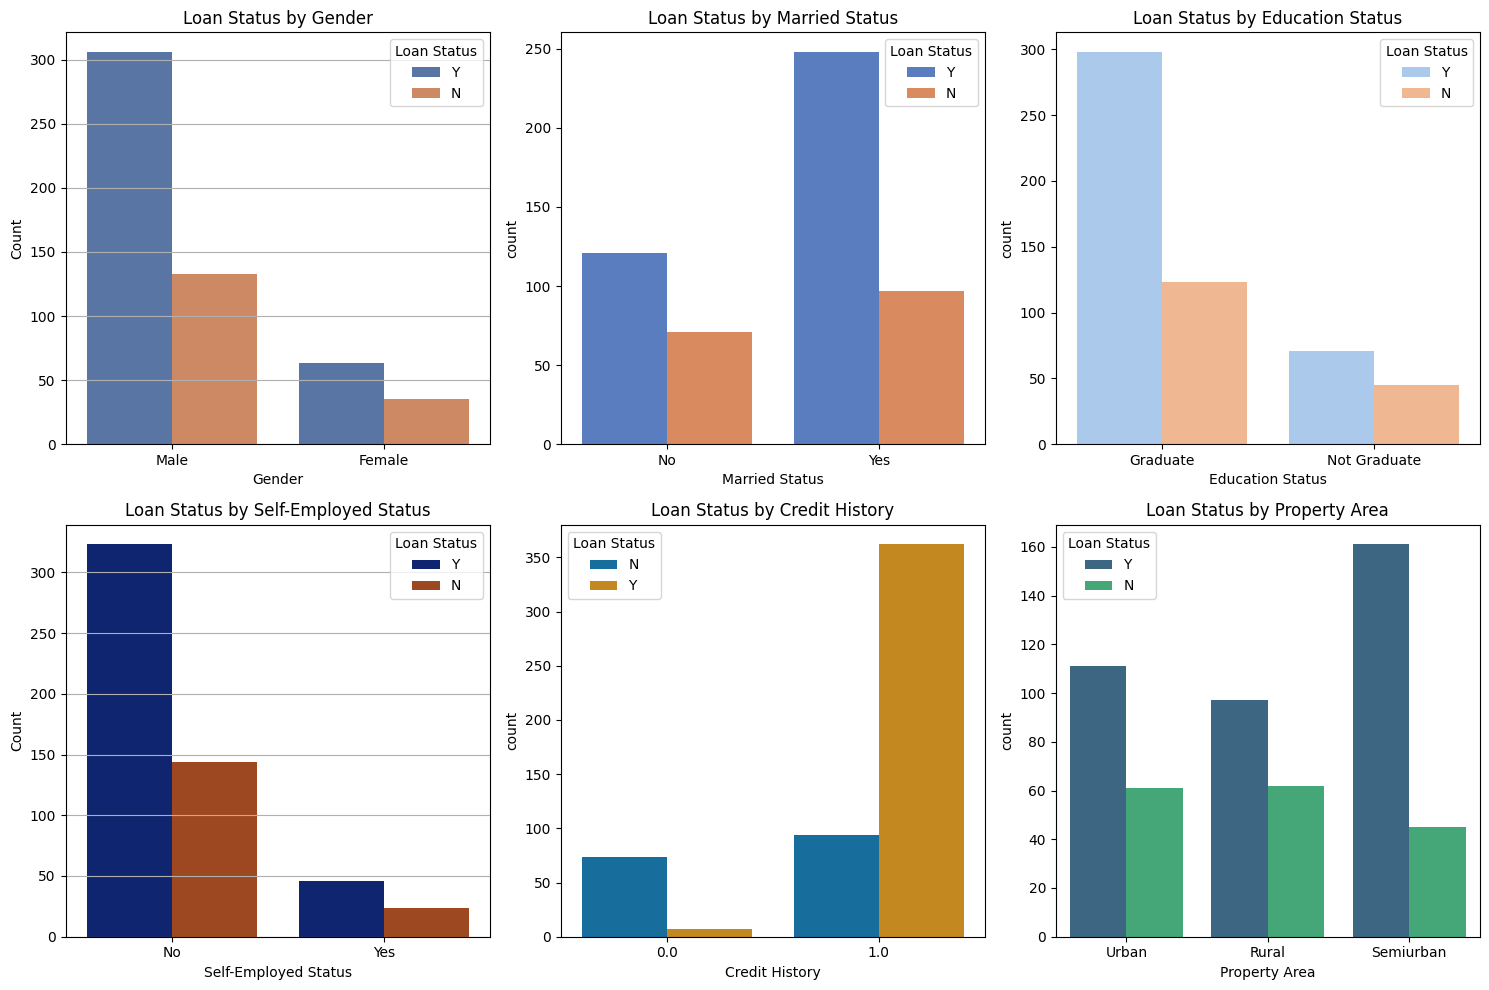

In [26]:
# make six bar charts that create the basica comparisons listed below
# each should have legends, and as different colors as possible.
# Plots 1 and 4 should have y labels and ticks while the rest of them should not

plt.figure(figsize=(15, 10))

# Plot 1: Comparison between Genders
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='gender', hue='loan_status', palette='deep')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.grid(axis='y')

# Plot 2: Comparison between Married Status
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='married', hue='loan_status', palette='muted')
plt.title('Loan Status by Married Status')
plt.xlabel('Married Status')
plt.legend(title='Loan Status')

# Plot 3: Comparison between Education Status
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='education', hue='loan_status', palette='pastel')
plt.title('Loan Status by Education Status')
plt.xlabel('Education Status')
plt.legend(title='Loan Status')

# Plot 4: Comparison between Self-Employed or Not
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='self_employed', hue='loan_status', palette='dark')
plt.title('Loan Status by Self-Employed Status')
plt.xlabel('Self-Employed Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.grid(axis='y')

# Plot 5: Comparison between Credit History
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='credit_history', hue='loan_status', palette='colorblind')
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.legend(title='Loan Status')

# Plot 6: Comparison between Property Area
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='property_area', hue='loan_status', palette='viridis')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [27]:
px.sunburst( data_frame=df,path=['gender','loan_status'], color='loan_amount')


# try this code to see if it works. Can you fix it

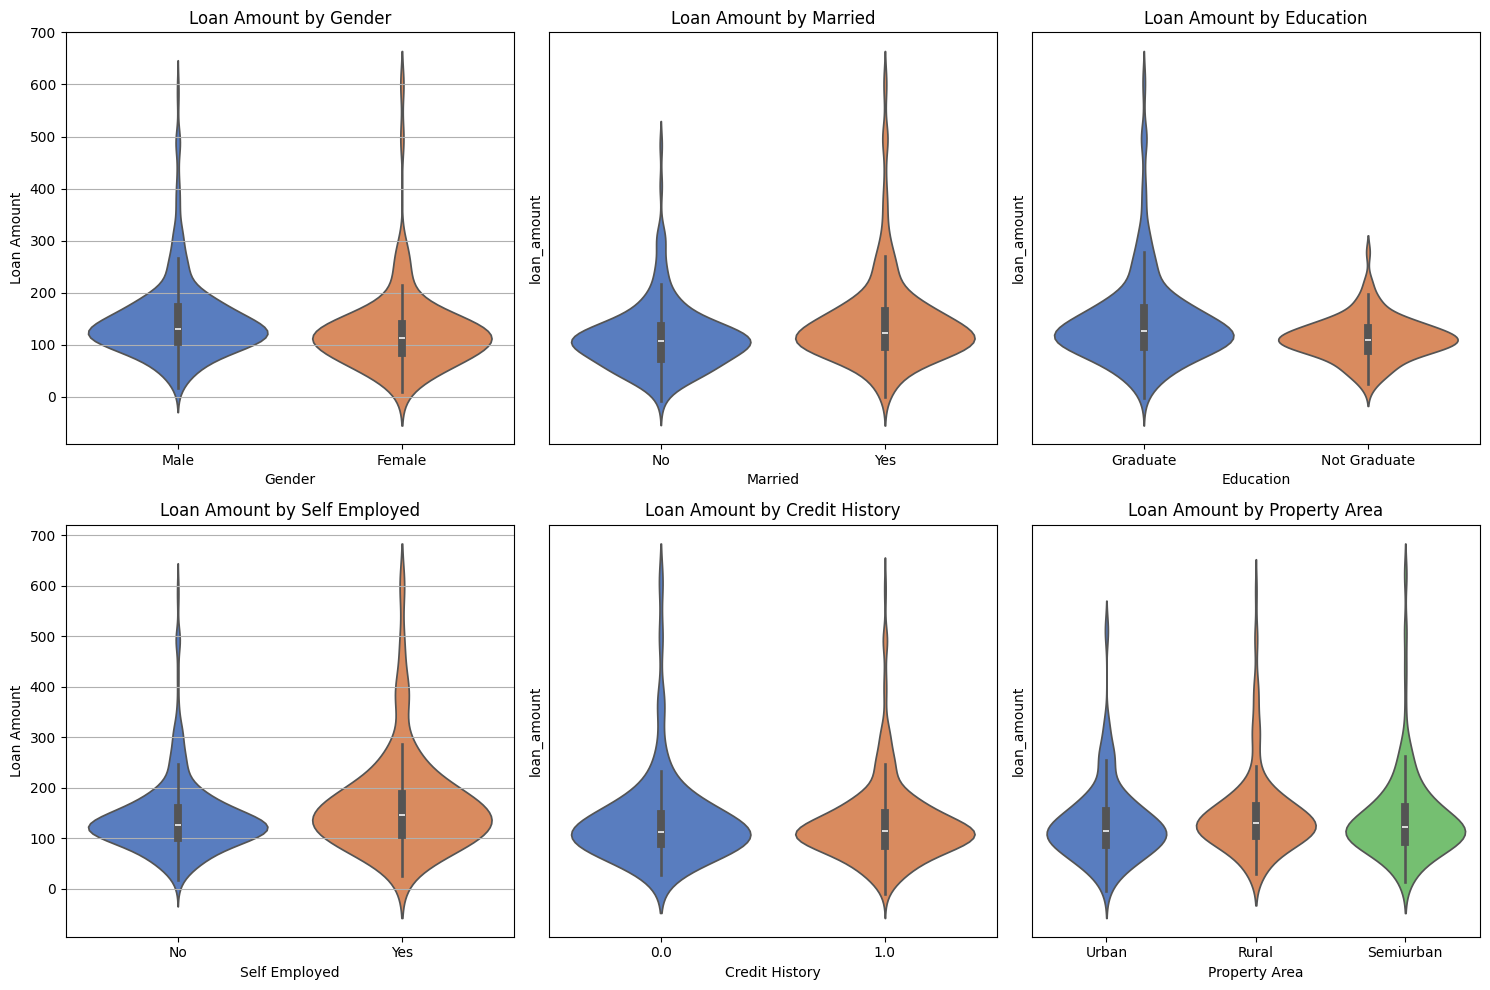

In [28]:
plt.figure(figsize=(15,10))

# create violin plots that have the six features shown above in the x value and loan amount in the y value
# Plots 1 and 4 should have y labels and ticks while the rest of them should not

features = ['gender', 'married', 'education', 'self_employed', 'credit_history', 'property_area']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, x=feature, y='loan_amount', palette='muted')
    plt.title(f'Loan Amount by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    
    if i in [1, 4]:
        plt.ylabel('Loan Amount')
    else:
        plt.yticks([])
    
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

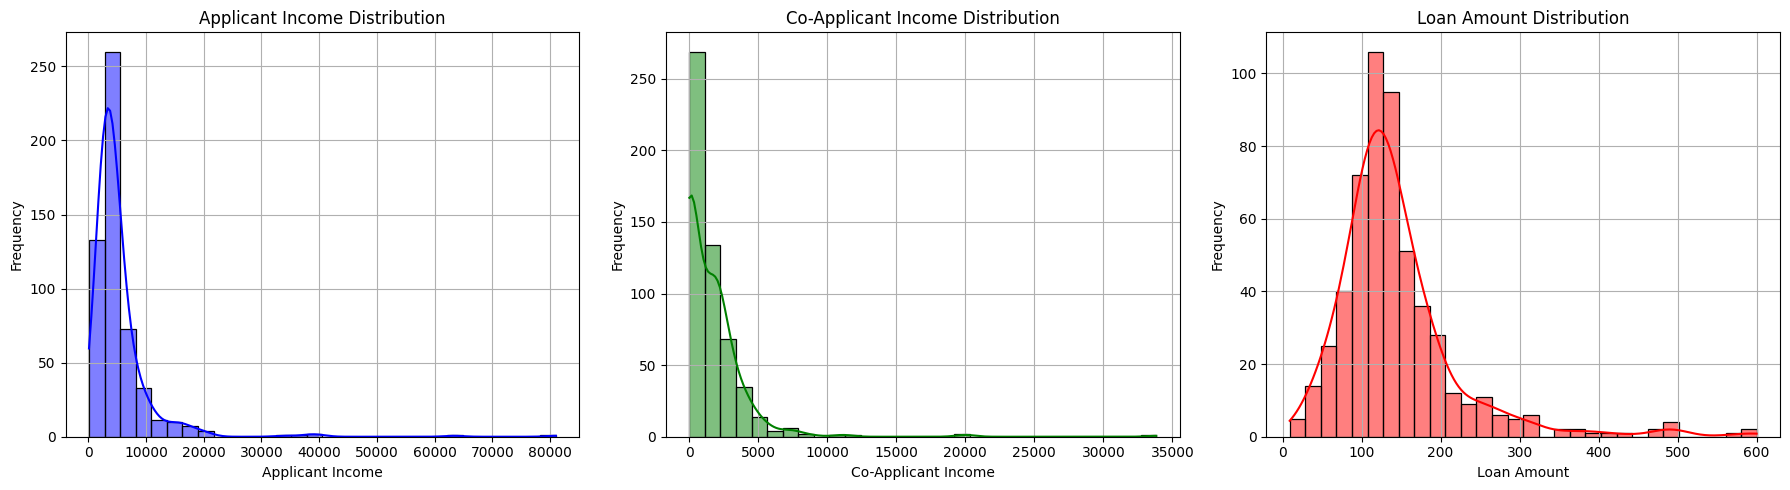

In [29]:
plt.figure(figsize=(18,5))

# Make three subplots that show frequency distributions of applicant incomes, co-applicant incomes and loan amounts
# these should have lines and bars

# Plot 1: Frequency distribution of applicant income
plt.subplot(1, 3, 1)
sns.histplot(df['applicant_income'], kde=True, color='blue', bins=30) # type: ignore
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(True)

# Plot 2: Frequency distribution of co-applicant income
plt.subplot(1, 3, 2)
sns.histplot(df['coapplicant_income'], kde=True, color='green', bins=30) # type: ignore
plt.title('Co-Applicant Income Distribution')
plt.xlabel('Co-Applicant Income')
plt.ylabel('Frequency')
plt.grid(True)

# Plot 3: Frequency distribution of loan amount
plt.subplot(1, 3, 3)
sns.histplot(df['loan_amount'], kde=True, color='red', bins=30) # type: ignore
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
# px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

# try this command and see if it works
# doesn't work, rename co-applicant_income to coapplicant_income

px.scatter_3d(data_frame=df,x='applicant_income',y='coapplicant_income',z='loan_amount',color='loan_status')

##### 3-2-Encoding

###### 3-2-1-gender

In [31]:
model1=LabelEncoder()

In [32]:
model1.fit(df['gender'])

LabelEncoder()

In [33]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [34]:
model2=LabelEncoder()

In [35]:
model2.fit(df['married'])

LabelEncoder()

In [36]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [37]:
model3=LabelEncoder()

In [38]:
model3.fit(df['education'])

LabelEncoder()

In [39]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [40]:
model4=LabelEncoder()

In [41]:
model4.fit(df['self_employed'])

LabelEncoder()

In [42]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [43]:
model5=LabelEncoder()

In [44]:
model5.fit(df['property_area'])

LabelEncoder()

In [45]:
df['property_area']= model5.transform(df['property_area'])

###### 3-2-6-loan status

In [46]:
model6=LabelEncoder()

In [47]:
model6.fit(df['loan_status'])

LabelEncoder()

In [48]:
df['loan_status']= model6.transform(df['loan_status'])

In [49]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

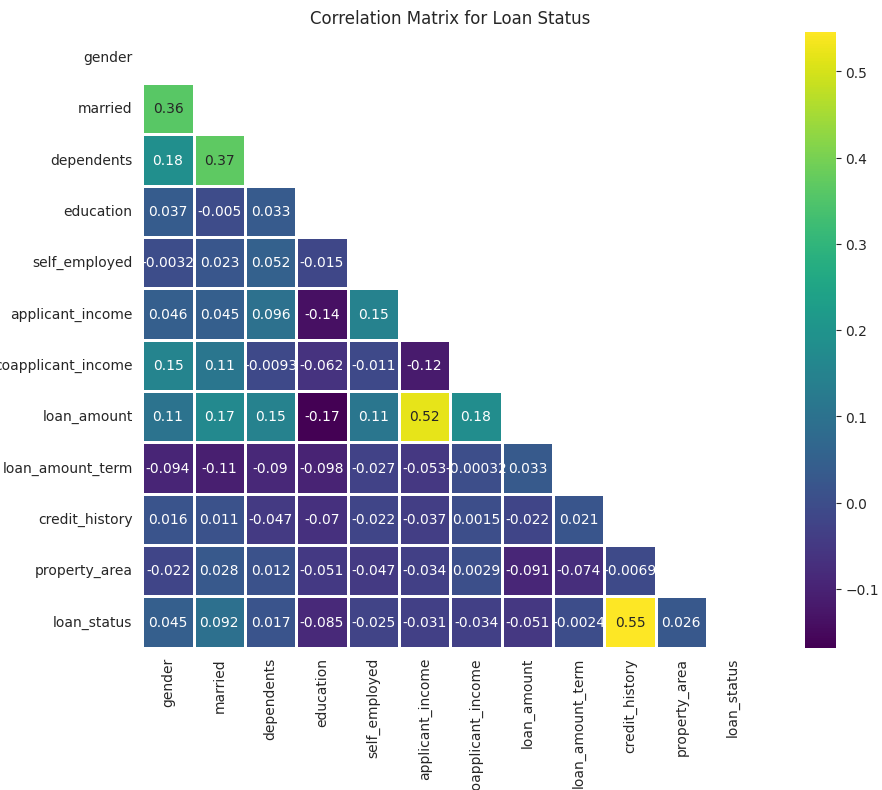

In [50]:
plt.figure(figsize=(12,8))

#Drop the loan id since it is not a feature
df_temp = df.drop('loan_id', axis=1)

corr = df_temp.corr()  #L1
mask = np.zeros_like(corr) #L2
mask[np.triu_indices_from(mask)] = True #L3
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

Explain what the encoder does here

The LabelEncoder encodes categorical labels into numeric format, fitting computes the unique categories and assigns a numeric value to each category in the gender column, transforming replaces the categorical values in the gender column with the numeriv values assigned during fitting. 

Explain what this plot would do if it did not include L1, L2, L3

Without the L1, L2, and L3 there would not be a generated correlation matrix for plotting, and the heatmap would b incomplete and clutterwed with redundant information that makes it harder to read and interpret.

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### 4-Prediction

##### 4-1-LogisticRegression

In [57]:
# Set a variable equal to the dataframe that has dropped the columns loan_id, and loan_status
# Hint: might want to control axis
# set 2nd variable equal to the dataframe with a singular feature loan status
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [58]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# set a variable equal to a logistic regression model
lr=LogisticRegression()

In [60]:
# fit your model to the training set
lr.fit(X_train, y_train)

LogisticRegression()

In [61]:
# set a variable to the logistic regression prediction of the test set
# basically if your variables were X and y the use logistic regression to predict X-test
lr_prediction=lr.predict(X_test)

In [87]:
print(confusion_matrix(y_test,lr_prediction))

# Explain confusion matrix


print('\n')
print(classification_report(y_test,lr_prediction))

# Explain classification report

print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

# Do you feel like this is an accurate model?

[[ 22  27]
 [  0 113]]


              precision    recall  f1-score   support

           0       1.00      0.45      0.62        49
           1       0.81      1.00      0.89       113

    accuracy                           0.83       162
   macro avg       0.90      0.72      0.76       162
weighted avg       0.87      0.83      0.81       162



Logistic Regression accuracy:  0.8333333333333334


# 4-2-More models

### Decision Tree Classifier

In [63]:
# Use this Decision Tree Classifier Model to complete the same thing on 

# Random Forest Classifier
# K Nearest Neighbors
# SVC

In [64]:
dt=DecisionTreeClassifier()

In [65]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
dt_prediction=dt.predict(X_test)

In [ ]:
# Confusion Matrix and Model Accuracy

print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

[[14 17]
 [15 63]]


              precision    recall  f1-score   support

           0       0.48      0.45      0.47        31
           1       0.79      0.81      0.80        78

    accuracy                           0.71       109
   macro avg       0.64      0.63      0.63       109
weighted avg       0.70      0.71      0.70       109



Decision Tree Accuracy:  0.7064220183486238


##### 4-3-Random Forest

In [67]:
# Box for model
rf=RandomForestClassifier()

In [68]:
# Box for fit
rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
# Box for prediction
rf_prediction=rf.predict(X_test)

In [78]:
# Box for Confusion Matrix and Model Accuracy

print(confusion_matrix(y_test,rf_prediction))
print('\n')
print(classification_report(y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))

[[ 28  21]
 [  4 109]]


              precision    recall  f1-score   support

           0       0.88      0.57      0.69        49
           1       0.84      0.96      0.90       113

    accuracy                           0.85       162
   macro avg       0.86      0.77      0.79       162
weighted avg       0.85      0.85      0.83       162



Random Forest Accuracy:  0.845679012345679


##### 4-4-KNearest Neighbors

In [71]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.30864197530864196, 0.3888888888888889, 0.32098765432098764, 0.3765432098765432, 0.32098765432098764, 0.3395061728395062, 0.30864197530864196, 0.3271604938271605, 0.2962962962962963, 0.32098765432098764, 0.2962962962962963, 0.29012345679012347, 0.29012345679012347, 0.29012345679012347, 0.2839506172839506, 0.30246913580246915, 0.3148148148148148, 0.30864197530864196, 0.30864197530864196, 0.3148148148148148, 0.30864197530864196, 0.3148148148148148, 0.30864197530864196, 0.30246913580246915, 0.2962962962962963, 0.30246913580246915, 0.29012345679012347, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.30246913580246915, 0.32098765432098764, 0.30246913580246915]


Text(0.5, 1.0, 'Elbow Method')

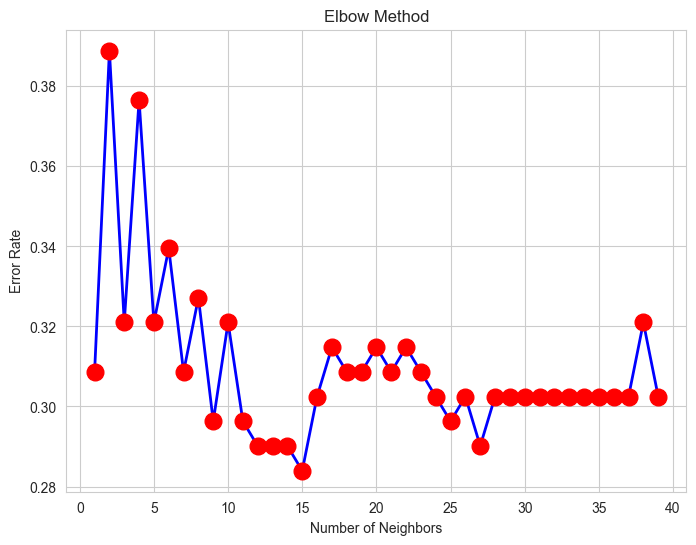

In [72]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [ ]:
# Run the above two boxes to get the number of necessary nearest neighbors
# Please look up what would tell you what number to use from this 

# https://www.kdnuggets.com/2020/04/introduction-k-nearest-neighbour-algorithm-using-examples.html
# We have to look for the thing with the lowest error rate in which ikn the graph this nunmber is 15 since it has the lowest error rate

In [73]:
# Get Number from above cells

knn=KNeighborsClassifier(n_neighbors=15)

In [74]:
# Box for fitting 

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [75]:
# Box for predictions

knn_prediction=knn.predict(X_test)

In [77]:
# Box for Confusion Matrix and Model Accuracy

print(confusion_matrix(y_test,knn_prediction))

print('\n')
print(classification_report(y_test,knn_prediction))

print('\n')
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))

[[ 10  39]
 [  7 106]]


              precision    recall  f1-score   support

           0       0.59      0.20      0.30        49
           1       0.73      0.94      0.82       113

    accuracy                           0.72       162
   macro avg       0.66      0.57      0.56       162
weighted avg       0.69      0.72      0.66       162



KNN Accuracy:  0.7160493827160493


##### 4-5-SVC

In [79]:
# Box for model

svc=SVC()

In [82]:
# Box for fitting 

svc.fit(X_train, y_train)

SVC()

In [83]:
# Box for predicting

svc_prediction=svc.predict(X_test)

In [84]:
# Box for Confusion Matrix and Model Accuracy

print(confusion_matrix(y_test,svc_prediction))

print('\n')

print(classification_report(y_test,svc_prediction))

print('\n')

print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

[[  0  49]
 [  0 113]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.70      1.00      0.82       113

    accuracy                           0.70       162
   macro avg       0.35      0.50      0.41       162
weighted avg       0.49      0.70      0.57       162



SVC Accuracy:  0.6975308641975309


In [86]:
# Using the example for logistic regression please print the accuracy scores for the 5 models you used.
# Please Let me know you conclusions in the last box. 
# one about the data
# the second about which model is best

print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8333333333333334
Decision Tree Accuracy:  0.7654320987654321
Random Forest Accuracy:  0.845679012345679
KNN Accuracy:  0.7160493827160493
SVC Accuracy:  0.6975308641975309


### CONCLUSION

1. Tell me what you learned from the data
- From the correlation matrix: there is a strong positive correlation between Credit_History and Loan_Status (0.54). This indicates that applicants with a good credit history are more likely to have their loans approved. ApplicantIncome has a moderate positive correlation with LoanAmount (0.57) suggesting that higher aplicant incomes are more likely to get higher loan amounts to get approved. There is a weak positive correlation between Education and Loan_Status (0.13) which may mean that there is a slight probability in graduates getting a loan approved compared to non-graduates. 
- Overall, Credit history is the most significant factor influencing loan approval. Applicant income is positively correlated with the loan amount requested. Education level of the applicant has a minor influence on loan approval, with graduates slightly more likely to get approval. Property area has a minor influence on loan approval rates.

2. Which model is best and why?:
- The best model is **random forest** since it has the highest accuracy at ~84.5% 
- The precision (0.88 for class 0 and 0.84 for class 1) and recall (0.57 for class 0 and 0.96 for class 1) metrics are quite balanced, shows that the model performs well in both predicting true positives and minimizing false positives.
- The F1-score for class 1 is 0.90, which is higher than the other models, indicating a good balance between precision and recall.

The Logistic Regression model also performs well, with an accuracy of 0.83 and good precision and recall, but the Random Forest model does better slightly overall.